In [9]:
import re
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv('Vikas_chat_clean.csv')
data.head(20)

,date,time,sender,message
0,31/08/21,11:30,Shivprasad Lagade,+91 74993 77097
1,26/09/21,01:01,Shivprasad Lagade,❤‍🔥❤‍🔥❤‍🔥
2,26/09/21,01:02,Vikas Kolgaonkar,Share kar share !
3,26/09/21,01:03,Shivprasad Lagade,Kelo bhau
4,26/09/21,01:04,Shivprasad Lagade,Barbeque Nation tuz ek no ahe 🔥
5,26/09/21,01:05,Vikas Kolgaonkar,😂
6,26/09/21,01:05,Vikas Kolgaonkar,ThAnk you bahy
7,26/09/21,01:05,Shivprasad Lagade,😂😂😂
8,26/09/21,01:05,Vikas Kolgaonkar,👍
9,26/09/21,01:05,Shivprasad Lagade,👏


In [13]:
data.shape

(2248, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 1 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                   --------------  ----- 
 0   06/06/21, 21:50 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.  3764 non-null   object
dtypes: object(1)
memory usage: 30.5+ KB


In [14]:
data['time']

0       11:30
1       01:01
2       01:02
3       01:03
4       01:04
        ...  
2243    10:34
2244    11:19
2245    11:19
2246    14:20
2247    14:21
Name: time, Length: 2248, dtype: object

In [15]:
data[data['sender']=='Shivprasad Lagade'].shape

(1259, 4)

In [16]:
data[data['sender']=='Vikas Kolgaonkar'].shape

(989, 4)

In [17]:
data.columns

Index(['date', 'time', 'sender', 'message'], dtype='object')

In [18]:
words=[]
for message in data['message']:
    words.extend(message.split())

In [19]:
len(words)

9043

In [20]:
from urlextract import URLExtract
links=[]
for message in data['message']:
    print(extractor.find_urls(message))

NameError: name 'extractor' is not defined

In [ ]:
from urlextract import URLExtract
extractor = URLExtract()
links = []
for message in data['message']:
    links.extend(extractor.find_urls(message))


In [21]:
len(links)

0

In [22]:
x=data['sender'].value_counts()
x

sender
Shivprasad Lagade    1259
Vikas Kolgaonkar      989
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

In [24]:
name=x.index
count=x.values

<BarContainer object of 2 artists>

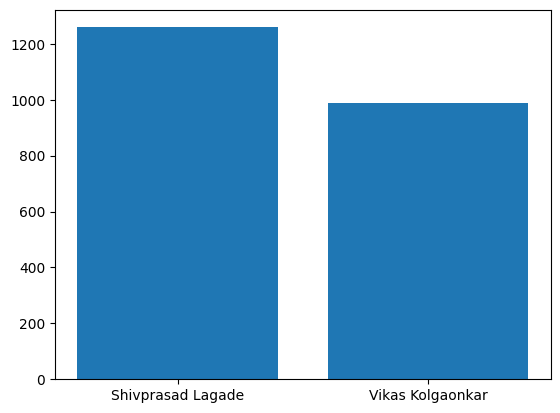

In [25]:
plt.bar(name,count)

In [26]:
round((data['sender'].value_counts()/data.shape[0])*100,2).reset_index().rename(columns={'sender':'name'})

,name,count
0,Shivprasad Lagade,56.01
1,Vikas Kolgaonkar,43.99


In [27]:
data.count

<bound method DataFrame.count of           date   time             sender  \
0     31/08/21  11:30  Shivprasad Lagade   
1     26/09/21  01:01  Shivprasad Lagade   
2     26/09/21  01:02   Vikas Kolgaonkar   
3     26/09/21  01:03  Shivprasad Lagade   
4     26/09/21  01:04  Shivprasad Lagade   
...        ...    ...                ...   
2243  22/08/25  10:34  Shivprasad Lagade   
2244  22/08/25  11:19   Vikas Kolgaonkar   
2245  22/08/25  11:19  Shivprasad Lagade   
2246  22/08/25  14:20  Shivprasad Lagade   
2247  22/08/25  14:21  Shivprasad Lagade   

                                              message  
0                                     +91 74993 77097  
1                                           ❤‍🔥❤‍🔥❤‍🔥  
2                                   Share kar share !  
3                                           Kelo bhau  
4                     Barbeque Nation tuz ek no ahe 🔥  
...                                               ...  
2243                                          

In [30]:
words=[]
for message in data['message']:
    (words.extend(message.split())

SyntaxError: incomplete input (3114121844.py, line 3)

In [40]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,-,527
1,Shivprasad,301
2,Lagade:,299
3,<Media,266
4,omitted>,266
5,Vikas,221
6,Kolgaonkar:,216
7,Hi,81
8,ki,61
9,la,57


In [32]:
words[:10]

['+91',
 '74993',
 '77097',
 '❤\u200d🔥❤\u200d🔥❤\u200d🔥',
 'Share',
 'kar',
 'share',
 '!',
 'Kelo',
 'bhau']

In [ ]:
!pip install emoji

In [41]:
import emoji

In [42]:
from emoji import EMOJI_DATA
emojis = []
for message in data['message']:
    emojis.extend([c for c in message if c in EMOJI_DATA])

In [43]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,29
1,👍,28
2,🤣,20
3,❤,8
4,👏,5
5,🥳,5
6,🎉,5
7,🍴,5
8,🔖,5
9,📍,5


In [44]:
plt.bar(emojis[0].head(),emojis[1].head())

AttributeError: 'str' object has no attribute 'head'

In [34]:
!python -m pip install --upgrade pip

In [45]:
data['month_num']=data['date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values